# Setup:🏗️

Imports, run first!

In [1]:
#Data manipulation:

import numpy as np
import pandas as pd

#Plotting:

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#Machine learning:

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from generate_dataset import dat_2_df, dat_2_2d_arr

#Misc:

from tqdm import tqdm 


Definitions of path names and other things, for simpler to read code.

In [2]:
tec_SW  = "small_wave/tec.dat"
mesh_SW = "small_wave/mesh.dat"
tec_LW  = "large_wave/tec.dat"
mesh_LW = "large_wave/mesh.dat"
tec_OH  = "one_hill/tec.dat"
mesh_OH = "one_hill/mesh.dat"
tec_TH  = "two_hills/tec.dat"
mesh_TH = "two_hills/mesh.dat"

Path definitions for Benjamin, run this one instead of the one above and everything else should work as normal 😉


In [3]:
tec_SW  = "/Users/benjaminjonsson/Programmering/Kandidat/small_wave/tec.dat"
mesh_SW = "/Users/benjaminjonsson/Programmering/Kandidat/small_wave/mesh.dat"
tec_LW  = "/Users/benjaminjonsson/Programmering/Kandidat/large_wave/tec.dat"
mesh_LW = "/Users/benjaminjonsson/Programmering/Kandidat/large_wave/mesh.dat"
tec_OH  = "/Users/benjaminjonsson/Programmering/Kandidat/one_hill/tec.dat"
mesh_OH = "/Users/benjaminjonsson/Programmering/Kandidat/one_hill/mesh.dat"
tec_TH  = "/Users/benjaminjonsson/Programmering/Kandidat/two_hills/tec.dat"
mesh_TH = "/Users/benjaminjonsson/Programmering/Kandidat/two_hills/mesh.dat"

A collection of methods, run before executing any code below. Consider putting these into separate files and importing the methods.


In [26]:
# Method for scaling every column in a dataframe, returns a copy of the dataframe with all variables scaled.
def scale_all(df:pd.DataFrame) -> pd.DataFrame:
    scaler = StandardScaler() 
    df_temp = df.copy(deep=True)
    for col in df.columns:
        df_temp[col] = scaler.fit_transform(df[[col]])

    return df_temp 

# Takes a dataframe, x, y, z variables(as specific columns in that dataframe), and a title string and produces a 3d scatter plot. 
# The name of the dataframe columns will be used as axis names.
def scatter_3d(df,x,y,z,title):
    fig = px.scatter_3d(df, 
                    x=x, 
                    y=y, 
                    z=z, 
                    opacity=0.8, color_discrete_sequence=[z],
                    height=1000, width=1000
                   )

    # Set figure title
    fig.update_layout(title_text=title,
                    scene_camera_eye=dict(x=1.5, y=1.5, z=0.25), 
                    scene_camera_center=dict(x=0, y=0, z=-0.2),
                    scene = dict(xaxis=dict(backgroundcolor='white',
                                            color='black',
                                            gridcolor='lightgrey'),
                                yaxis=dict(backgroundcolor='white',
                                            color='black',
                                            gridcolor='lightgrey'
                                            ),
                                zaxis=dict(backgroundcolor='white',
                                            color='black', 
                                            gridcolor='lightgrey')))

    # Update marker size
    fig.update_traces(marker=dict(size=2))

    fig.show()
    #scatter_3d(df_SW,df_SW_scaled['x'],df_SW_scaled['y'],df_SW['duidxj'],"")

# Takes a dataframe, x, y, z variables(as specific columns in that dataframe), a pre trained model(obviously trained on the same data),
# and a title string and produces a 3d scatter plot. The name of the dataframe columns will be used as axis names.
def scatter_w_pred(df,x,y,z,model,title):

    fig = px.scatter_3d(df, 
                    x=x, 
                    y=y, 
                    z=z, 
                    opacity=0.8, color_discrete_sequence=['black'],
                    height=1000, width=1000
                   )

    # Set figure title
    fig.update_layout(title_text=title,
                    scene_camera_eye=dict(x=1.5, y=1.5, z=0.25), 
                    scene_camera_center=dict(x=0, y=0, z=-0.2),
                    scene = dict(xaxis=dict(backgroundcolor='white',
                                            color='black',
                                            gridcolor='lightgrey'),
                                yaxis=dict(backgroundcolor='white',
                                            color='black',
                                            gridcolor='lightgrey'
                                            ),
                                zaxis=dict(backgroundcolor='white',
                                            color='black', 
                                            gridcolor='lightgrey')))

    # Update marker size
    fig.update_traces(marker=dict(size=2))

     # ----------- For creating a prediciton plane to be used in the visualization -----------
    # Set Increments between points in a meshgrid
    mesh_size = .1
    # Return evenly spaced values based on a range between min and max
    xrange = np.arange(x.min(), x.max(), mesh_size)
    yrange = np.arange(y.min(), y.max(), mesh_size)
    # Create a meshgrid
    xx, yy = np.meshgrid(xrange, yrange)
    # Make predictions
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='prediction', 
                            colorscale=px.colors.sequential.Sunsetdark,opacity=.8,
                            showscale=False))

    fig.show()

# Plots the input variables dudx, dvdx, dudy, dvdy, duidxj, cmy, u, and v in the domain [x,y], 
# then adds a lovely title on top so that the user will know what dataset they are looking at.
def var_in_domain(x,y,dudx,dvdx,dudy,dvdy,duidxj,cmy,u,v,title):
    
    fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(16,13))
    fig.suptitle(title)

    plasma = plt.get_cmap('plasma')

    dudx   = ax1.contourf(x,y,dudx,levels=200 ,cmap= plasma)
    dvdx   = ax2.contourf(x,y,dvdx,levels=200,cmap= plasma)
    dudy   = ax3.contourf(x,y,dudy,levels=200,cmap= plasma)
    dvdy   = ax4.contourf(x,y,dvdy,levels=200,cmap= plasma)
    duidxj = ax5.contourf(x,y,duidxj,levels=200,cmap= plasma)
    cmy    = ax6.contourf(x,y,cmy,levels=200,cmap= plasma)
    u      = ax7.contourf(x,y,u,levels=200,cmap= plasma)
    v      = ax8.contourf(x,y,v,levels=200,cmap= plasma)

    fig.colorbar(dudx,ax=ax1)
    fig.colorbar(dvdx,ax=ax2)
    fig.colorbar(dudy,ax=ax3)
    fig.colorbar(dvdy,ax=ax4)
    fig.colorbar(duidxj,ax=ax5)
    fig.colorbar(cmy,ax=ax6,)
    fig.colorbar(u,ax=ax7,)
    fig.colorbar(v,ax=ax8,)

    ax1.set_title('$dudx$')
    ax2.set_title('$dvdx$')
    ax3.set_title('$dudy$')
    ax4.set_title('$dvdy$')
    ax5.set_title('$duidxj$')
    ax6.set_title('$C_{my}$')
    ax7.set_title('$u(x,y)$')
    ax8.set_title('$v(x,y)$')

    plt.show()
    

Create all four dataframes from .dat files


In [4]:
df_SW = dat_2_df(tec_SW,mesh_SW)
df_LW = dat_2_df(tec_LW,mesh_LW)
df_OH = dat_2_df(tec_OH,mesh_OH)
df_TH = dat_2_df(tec_TH,mesh_TH)

Apply scaling to the dataframe, in this we create a scaled dataframe as a copy.

In [5]:
df_SW_scaled = scale_all(df_SW)
df_LW_scaled = scale_all(df_LW)
df_OH_scaled = scale_all(df_OH)
df_TH_scaled = scale_all(df_TH)

Load the datasets as 2d numpy arrays:

In [29]:
dudx_SW, dvdx_SW, dudy_SW, dvdy_SW, cmy_SW, duidxj_SW, x_SW, y_SW, p_SW, u_SW, v_SW, uu_SW, vv_SW, ww_SW, uv_SW, eps_SW, k_SW = dat_2_2d_arr(tec_SW, mesh_SW)
dudx_LW, dvdx_LW, dudy_LW, dvdy_LW, cmy_LW, duidxj_LW, x_LW, y_LW, p_LW, u_LW, v_LW, uu_LW, vv_LW, ww_LW, uv_LW, eps_LW, k_LW = dat_2_2d_arr(tec_LW, mesh_LW)
dudx_OH, dvdx_OH, dudy_OH, dvdy_OH, cmy_OH, duidxj_OH, x_OH, y_OH, p_OH, u_OH, v_OH, uu_OH, vv_OH, ww_OH, uv_OH, eps_OH, k_OH = dat_2_2d_arr(tec_OH, mesh_OH)
dudx_TH, dvdx_TH, dudy_TH, dvdy_TH, cmy_TH, duidxj_TH, x_TH, y_TH, p_TH, u_TH, v_TH, uu_TH, vv_TH, ww_TH, uv_TH, eps_TH, k_TH = dat_2_2d_arr(tec_TH, mesh_TH)


# Plotting: 💹

Correlation matrix for the different variables:

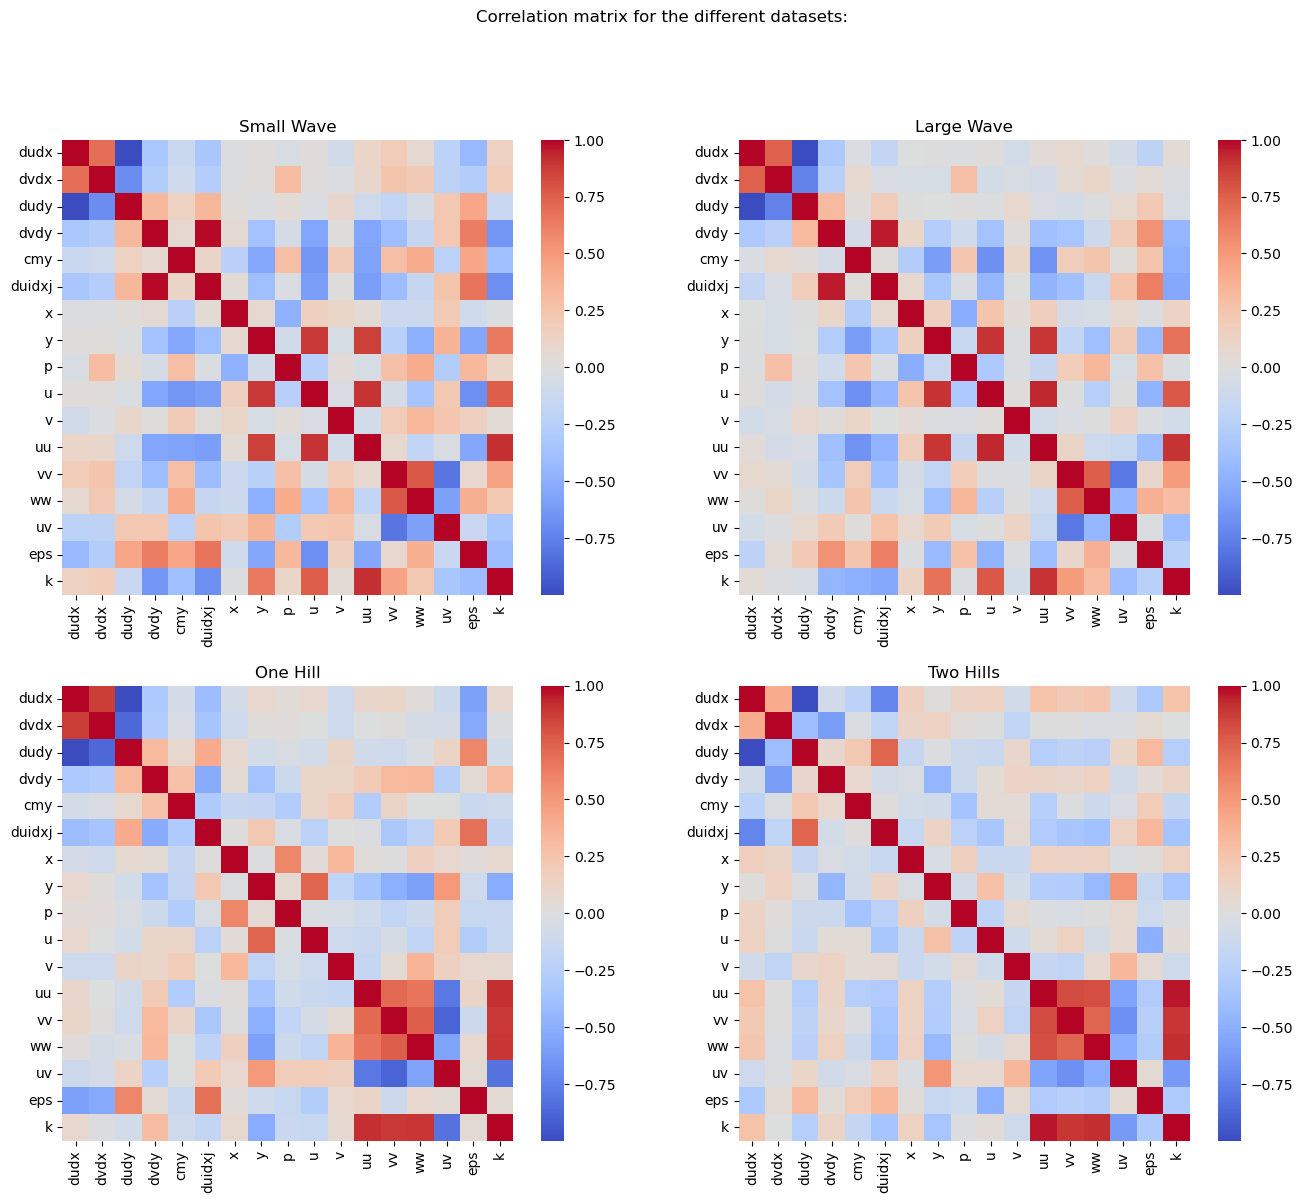

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,13))
fig.suptitle('Correlation matrix for the different datasets:')
sns.heatmap(df_SW.corr(), cmap='coolwarm',ax=ax1).set(title='Small Wave')
sns.heatmap(df_LW.corr(), cmap='coolwarm',ax=ax2).set(title='Large Wave')
sns.heatmap(df_OH.corr(), cmap='coolwarm',ax=ax3).set(title='One Hill')
sns.heatmap(df_TH.corr(), cmap='coolwarm',ax=ax4).set(title='Two Hills')
plt.show()

Plots of the variables in the different domains:


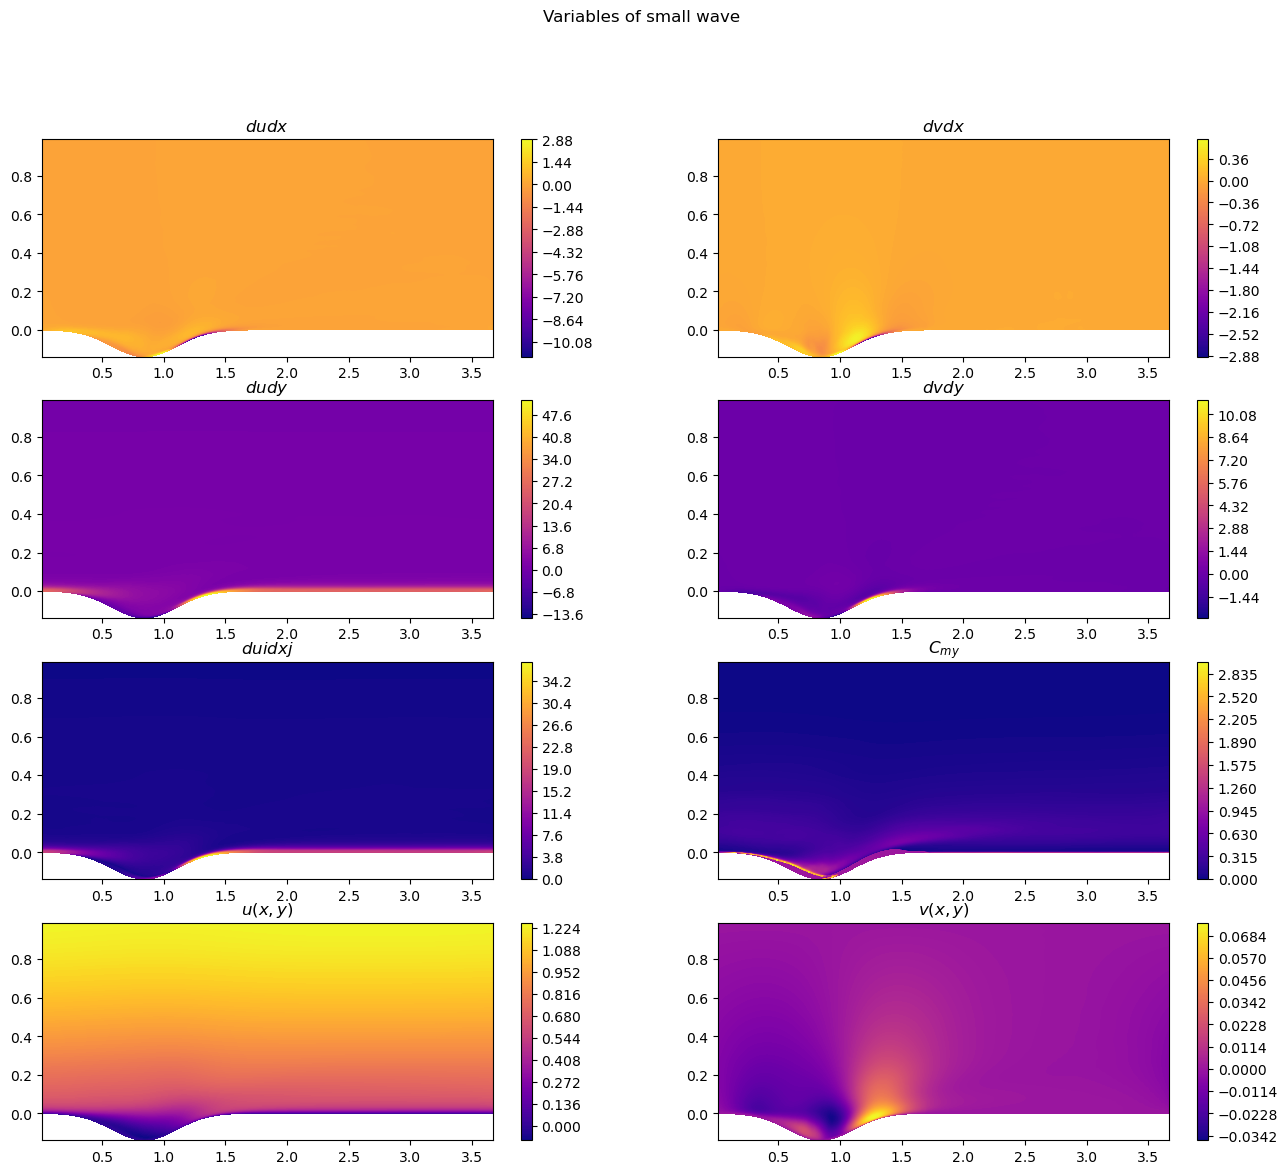

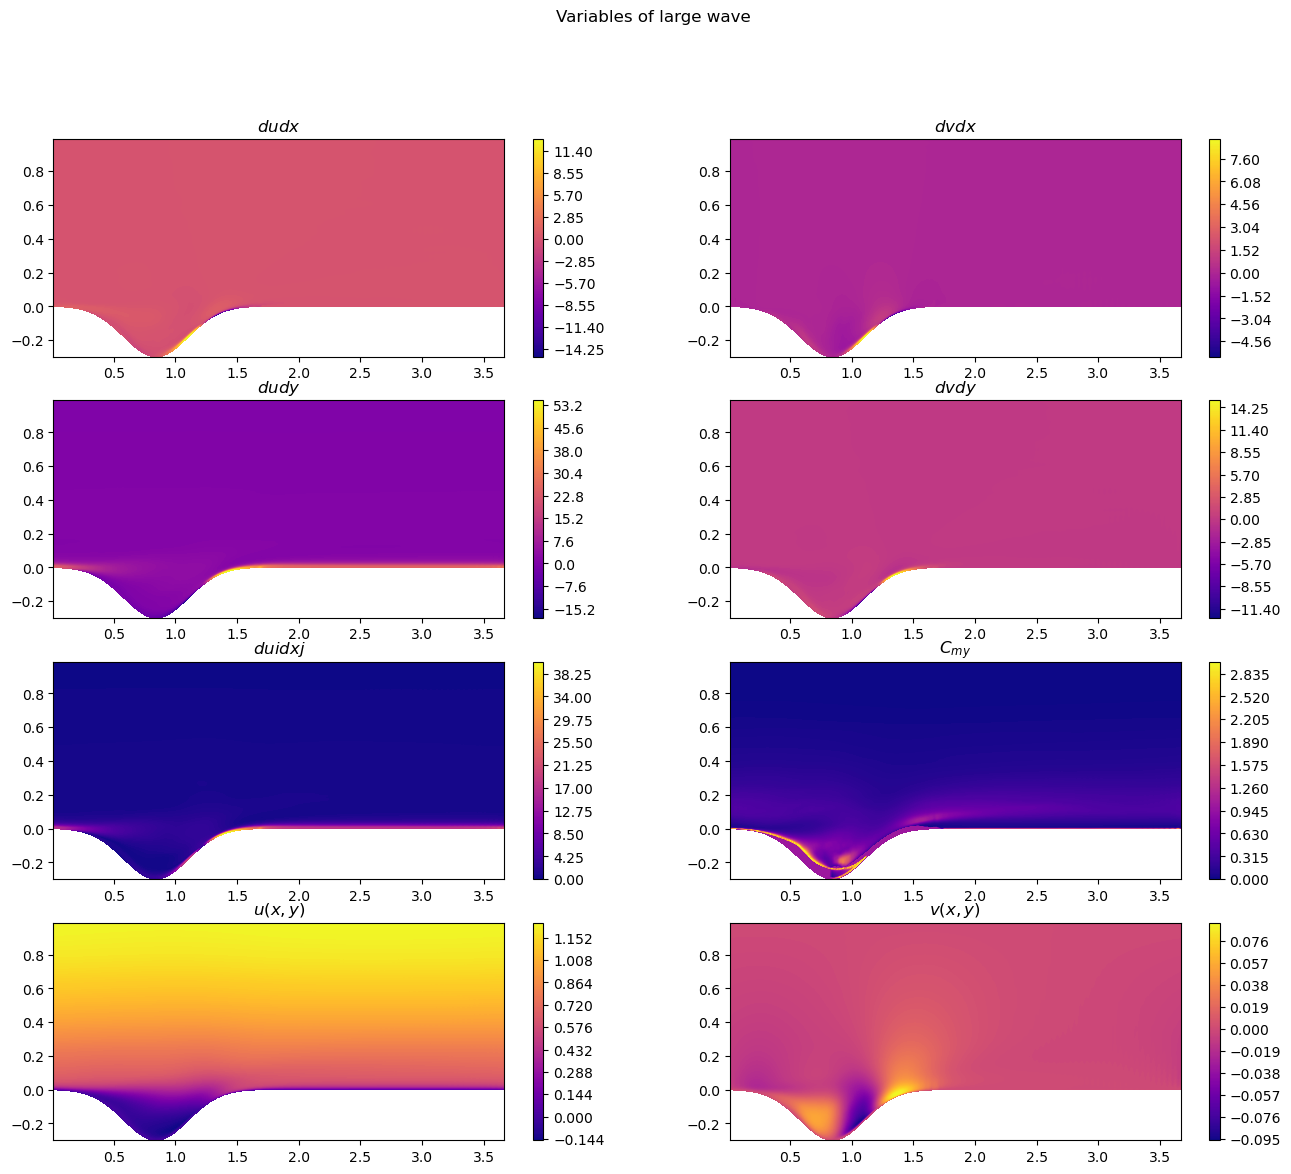

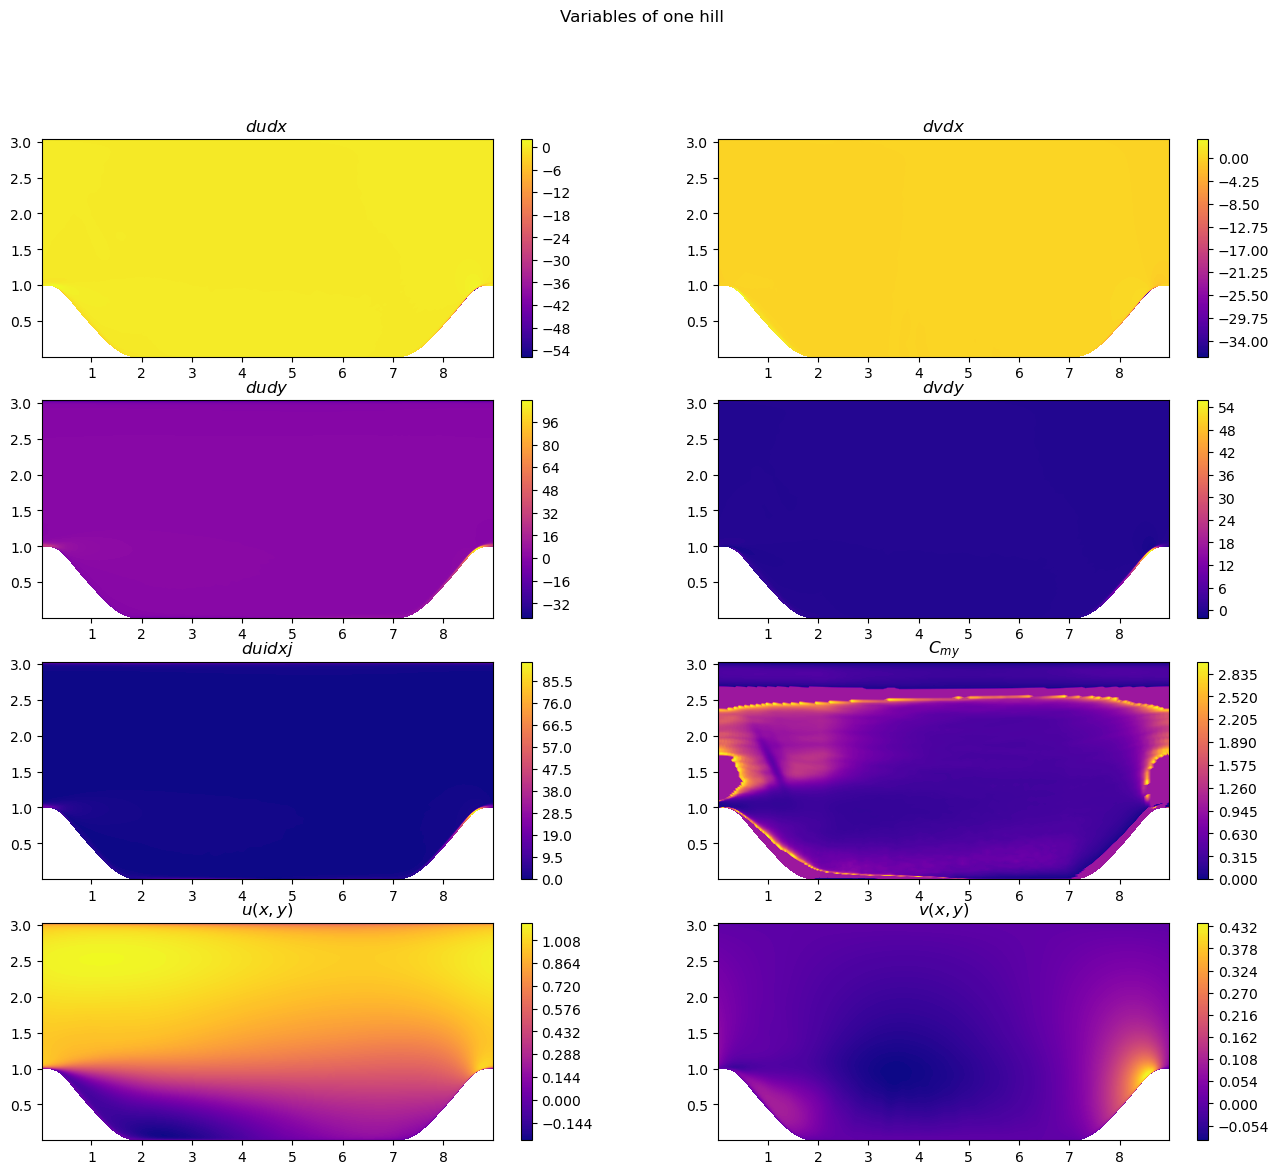

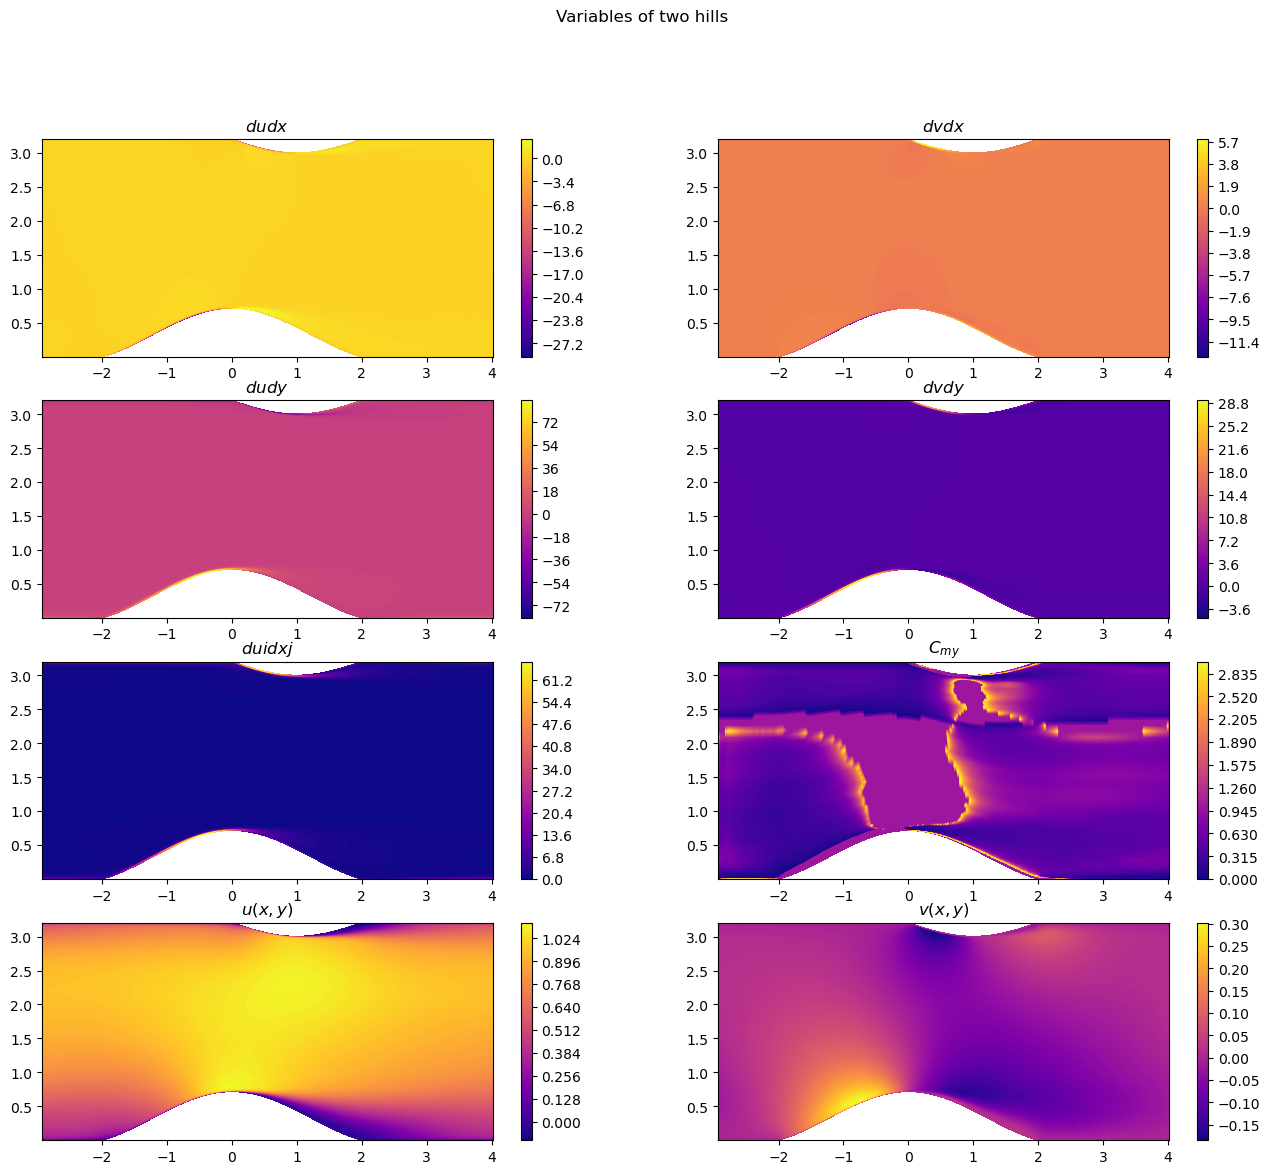

In [32]:
var_in_domain(x_SW, y_SW, dudx_SW, dvdx_SW, dudy_SW, dvdy_SW, duidxj_SW, cmy_SW, u_SW, v_SW,'Variables of small wave')
var_in_domain(x_LW, y_LW, dudx_LW, dvdx_LW, dudy_LW, dvdy_LW, duidxj_LW, cmy_LW, u_LW, v_LW,'Variables of large wave')
var_in_domain(x_OH, y_OH, dudx_OH, dvdx_OH, dudy_OH, dvdy_OH, duidxj_OH, cmy_OH, u_OH, v_OH,'Variables of one hill')
var_in_domain(x_TH, y_TH, dudx_TH, dvdx_TH, dudy_TH, dvdy_TH, duidxj_TH, cmy_TH, u_TH, v_TH,'Variables of two hills')

# Machine Learning: 🤖

Set up the machine learning model, in this case we test it on df_SW:


In [13]:
#Set up input/output variable(s)
X=df_SW_scaled[['v','u']]
Y=df_SW['cmy'].values

#Split into trainig set and test set:
X_train_SW, X_test_SW, Y_train_SW, Y_test_SW = train_test_split(X, Y, test_size=0.2, random_state=42)

#Choose model and fit it:
model = SVR(kernel='rbf', C=6, epsilon=0.01)
svr_SW = model.fit(X_train_SW, Y_train_SW)

In [15]:
# Load, and scale dataframe
df_SW = dat_2_df(tec_SW,mesh_SW)
df_SW_scaled = scale_all(df_SW)

# Choose in/out variable(s)
X=df_SW_scaled[['v','u']]
Y=df_SW['cmy']

# Split into trainig set and test set:
X_train_SW, X_test_SW, Y_train_SW, Y_test_SW = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test_SW = X_test_SW.reset_index()
Y_test_SW = Y_test_SW.reset_index()

# Choose model and fit it:
model = SVR(kernel='rbf', C=6, epsilon=0.01)
svr_SW = model.fit(X_train_SW, Y_train_SW)

In [16]:
#TODO if anyone can get rid of the userwarnng ole will be forever gratefull.
scatter_w_pred(df_SW, X_test_SW['v'], X_test_SW['u'], Y_test_SW['cmy'], svr_SW, "Scatter Plot with Prediction Surface")

c:\Users\Ole\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



# Below here lies work in progress or otherwise troublesome code, proceed with caution! 😱

Testing different values for C

In [24]:
mae = []    
eps_perc = []

c_range = np.linspace(0.01, 15, num=30)
eps = 0.01

for c in tqdm(c_range):
    
    varied_svr = SVR(kernel = 'rbf', C=c, epsilon = eps)
    varied_svr.fit(X_train_SW, Y_train_SW)
    
    test_mae = mean_absolute_error(Y_test_SW, varied_svr.predict(X_test_SW))
    mae.append(test_mae)
    
    perc_within_eps = 100*np.sum(abs(Y_test_SW-varied_svr.predict(X_test_SW)) <= eps) / len(Y_test_SW)
    eps_perc.append(perc_within_eps)

fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_range, eps_perc, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_range, mae, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

  0%|          | 0/30 [00:20<?, ?it/s]


KeyboardInterrupt: 

Plotting values in domain:


In [ ]:
fig, axs = plt.subplots(3,2, figsize=(16,13))
fig.suptitle('Variables of small wave')
axs[0,0].contourf(x_SW,y_SW,dudx_SW)
axs[0,1].contourf(x_SW,y_SW,dvdx_SW)
axs[1,0].contourf(x_SW,y_SW,dudy_SW)
axs[1,1].contourf(x_SW,y_SW,dvdy_SW)
axs[2,0].contourf(x_SW,y_SW,duidxj_SW)
axs[2,1].contourf(x_SW,y_SW,cmy_SW)